<a href="https://colab.research.google.com/github/SSubhedar14/Impact_of_Marketing_Variables_on_Sales_A_Linear_Regression_Approach/blob/main/Impact_of_Marketing_Variables_on_Sales_A_Linear_Regression_Approachipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Impact of Marketing Variables on Sales: A Linear Regression Approach**

#Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Import Dataset

First, we load the data from the CSV file into a pandas DataFrame and assigns it to the variable 'df'.

In [ ]:
df = pd.read_csv("/content/market_data.csv")

Then, the df.describe() generates a summary of statistics for the DataFrame. The describe() function computes various summary statistics, including count, mean, standard deviation, minimum, maximum, etc for each nomeric column in the DataFrame.

In [ ]:
df.describe()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,171327.118952,30.593034,0.251139,98.678740,0.494526,14.599829,1479.569556,1596.504284
std,81397.843301,17.493103,0.145348,57.117347,0.286810,8.715533,885.419636,927.474787
min,1992.000000,0.190000,0.000000,0.130000,0.000000,0.140000,4.000000,12.540000
25%,112479.250000,14.830000,0.130000,49.637500,0.250000,6.917500,708.250000,786.327500
50%,170390.500000,31.385000,0.250000,97.510000,0.490000,14.820000,1413.500000,1595.455000
75%,226027.250000,45.660000,0.380000,147.620000,0.740000,22.100000,2273.000000,2420.687500
max,393914.000000,59.960000,0.500000,199.910000,1.000000,29.990000,2997.000000,3198.270000


df.info() prints information about the DataFrame. The info() function provides details about the DataFrame, such as the number of nom-null entries in each column and the types of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale               992 non-null    int64  
 1   InStrSpending      992 non-null    float64
 2   Discount           992 non-null    float64
 3   TVSpending         992 non-null    float64
 4   StockRate          992 non-null    float64
 5   Price              992 non-null    float64
 6   Radio              992 non-null    int64  
 7   OnlineAdsSpending  992 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 62.1 KB


From the output, we know that all columns have 992 non-null integer.

The dataset discribes the number of sales per week of an unknown product. For each week the dataset provides several information for each week, i.e: InStrSpending, Discount, TVSpending, StockRate, Price, Radio, and OnlineAdsSpending. These columns form the independent variables while the Sale is dependent variable. We can build model to predict the Sale using the independent variables.

# Defining Features and Target For each Model and then applying Linear regression

Linear regression models the relationship between a dependent variable (Y) and independent variable(s) (X) by finding the best-fitting line. Ordinary Least Squares (OLS) minimizes the sum of squared differences between observed and predicted values, providing robust estimates even with non-normally distributed residuals, especially with large sample sizes.

## Model 1




Intercept: 124962.29
Coefficient for Price: -6472.43
Coefficient for TVSpending: 588.87
Coefficient for InStrSpending: 2874.51
Coefficient for OnlineAdsSpending: 0.22
Coefficient for Discount: 3561.84
Coefficient for StockRate: -13675.97
Coefficient for Radio: 0.15
                            OLS Regression Results                            
Dep. Variable:                   Sale   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.305e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:29:38   Log-Likelihood:                -7506.3
No. Observations:                 793   AIC:                         1.503e+04
Df Residuals:                     785   BIC:                         1.507e+04
Df Model:                           7                                         
Covariance Type:       

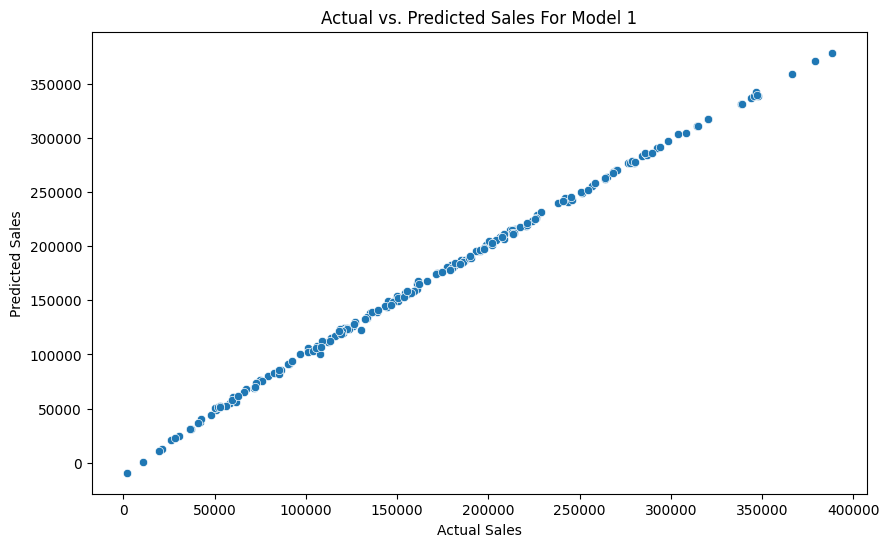

In [ ]:
X = df[['Price', 'TVSpending', 'InStrSpending', 'OnlineAdsSpending', 'Discount', 'StockRate', 'Radio']]
y = df['Sale']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Access the coefficients and print them
coefficients = model.coef_
intercept = model.intercept_
print(f"Intercept: {intercept:.2f}")
for i, coef in enumerate(coefficients):
    print(f"Coefficient for {X.columns[i]}: {coef:.2f}")

# Perform statistical analysis
X_train_with_intercept = sm.add_constant(X_train)  # Add an intercept (constant) term
model_with_intercept = sm.OLS(y_train, X_train_with_intercept).fit()
print(model_with_intercept.summary())

# Make predictions using model
y_pred = model.predict(X_test)

absolute_percentage_errors = abs((y_test - y_pred) / y_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mape = absolute_percentage_errors.mean()

print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Actual vs. Predicted Sales For Model 1")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

## Model 2

Model 2 (Excluding 'Radio'):
Intercept: 125204.32
Coefficient for Price: -6473.21
Coefficient for TVSpending: 588.87
Coefficient for InStrSpending: 2873.87
Coefficient for OnlineAdsSpending: 0.22
Coefficient for Discount: 3542.17
Coefficient for StockRate: -13665.89
Statistical Analysis for Model 2:
                            OLS Regression Results                            
Dep. Variable:                   Sale   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.518e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:29:42   Log-Likelihood:                -7507.0
No. Observations:                 793   AIC:                         1.503e+04
Df Residuals:                     786   BIC:                         1.506e+04
Df Model:                           6                              

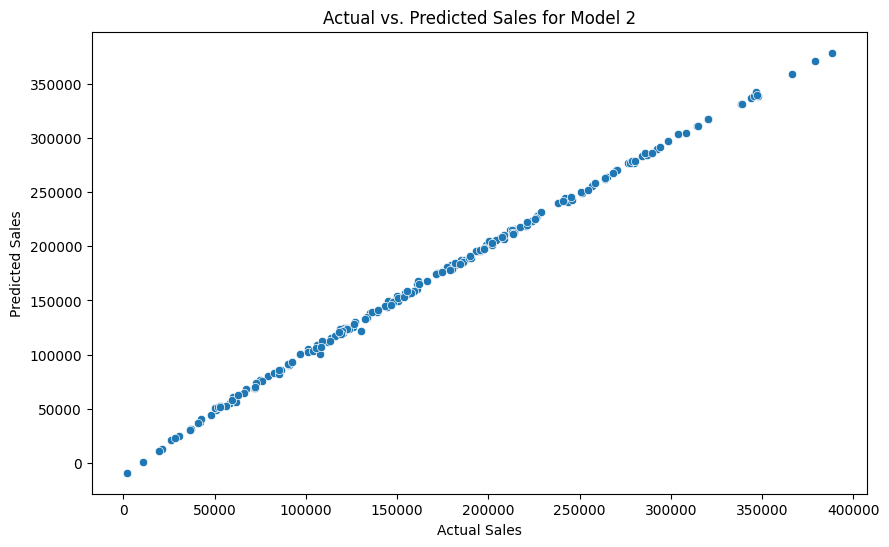

In [ ]:
# Create a new training feature set without 'Radio'
X_train2 = X_train.drop(columns=['Radio'])
X_test2 = X_test.drop(columns=['Radio'])

# Create a Linear Regression model for X_train2
model2 = LinearRegression()

# Train model2 on X_train2 and y_train
model2.fit(X_train2, y_train)

# Access the coefficients and print them for model2
coefficients_model2 = model2.coef_
intercept_model2 = model2.intercept_
print("Model 2 (Excluding 'Radio'):")
print(f"Intercept: {intercept_model2:.2f}")
for i, coef in enumerate(coefficients_model2):
    print(f"Coefficient for {X_train2.columns[i]}: {coef:.2f}")

# Perform statistical analysis for model2
X_train_with_intercept_model2 = sm.add_constant(X_train2)
model_with_intercept_model2 = sm.OLS(y_train, X_train_with_intercept_model2).fit()
print("Statistical Analysis for Model 2:")
print(model_with_intercept_model2.summary())

# Make predictions using model
y_pred2 = model2.predict(X_test2)

absolute_percentage_errors2 = abs((y_test - y_pred2) / y_test)

# Evaluate the model's performance
r2_2 = r2_score(y_test, y_pred2)
mape_2 = absolute_percentage_errors2.mean()

print(f"R-squared (R2): {r2_2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_2:.2f}%")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred2)
plt.title("Actual vs. Predicted Sales for Model 2")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

## Model 3

Model 3 (Excluding 'Radio' and 'OnlineAdsSpending'):
Intercept: 125559.71
Coefficient for Price: -6473.84
Coefficient for TVSpending: 588.87
Coefficient for InStrSpending: 2874.58
Coefficient for Discount: 3483.49
Coefficient for StockRate: -13660.44
Statistical Analysis for Model 3:
                            OLS Regression Results                            
Dep. Variable:                   Sale   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.019e+05
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:29:45   Log-Likelihood:                -7508.7
No. Observations:                 793   AIC:                         1.503e+04
Df Residuals:                     787   BIC:                         1.506e+04
Df Model:                           5                                         
Cova

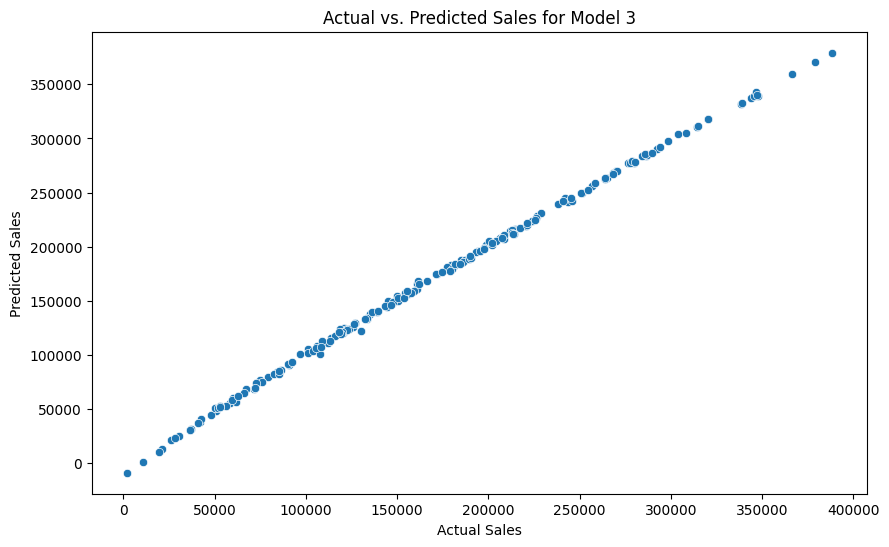

In [ ]:
# Create a new training feature set without 'Radio'
X_train3 = X_train.drop(columns=['Radio', 'OnlineAdsSpending'])
X_test3 = X_test.drop(columns=['Radio', 'OnlineAdsSpending'])

# Create a Linear Regression model for X_train3
model3 = LinearRegression()

# Train model3 on X_train3 and y_train
model3.fit(X_train3, y_train)

# Access the coefficients and print them for model3
coefficients_model3 = model3.coef_
intercept_model3 = model3.intercept_
print("Model 3 (Excluding 'Radio' and 'OnlineAdsSpending'):")
print(f"Intercept: {intercept_model3:.2f}")
for i, coef in enumerate(coefficients_model3):
    print(f"Coefficient for {X_train3.columns[i]}: {coef:.2f}")

# Perform statistical analysis for model3
X_train_with_intercept_model3 = sm.add_constant(X_train3)
model_with_intercept_model3 = sm.OLS(y_train, X_train_with_intercept_model3).fit()
print("Statistical Analysis for Model 3:")
print(model_with_intercept_model3.summary())

# Make predictions using model3
y_pred3 = model3.predict(X_test3)

absolute_percentage_errors3 = abs((y_test - y_pred3) / y_test)

# Evaluate the model's performance
r2_3 = r2_score(y_test, y_pred3)
mape_3 = absolute_percentage_errors3.mean()

print(f"R-squared (R2): {r2_3:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_3:.2f}%")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred3)
plt.title("Actual vs. Predicted Sales for Model 3")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

## Comparing models based on performance metrics

In [ ]:
# Comparison of model performance metrics
print("Model Performance Metrics:")
print("Model 1 (All Features):")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

print("\nModel 2 (Excluding 'Radio'):")
print(f"R-squared (R2): {r2_2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_2:.2f}%")

print("\nModel 3 (Excluding 'Radio' and 'OnlineAdsSpending'):")
print(f"R-squared (R2): {r2_3:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_3:.2f}%")



Model Performance Metrics:
Model 1 (All Features):
R-squared (R2): 0.9987
Mean Absolute Percentage Error (MAPE): 0.06%

Model 2 (Excluding 'Radio'):
R-squared (R2): 0.9987
Mean Absolute Percentage Error (MAPE): 0.06%

Model 3 (Excluding 'Radio' and 'OnlineAdsSpending'):
R-squared (R2): 0.9987
Mean Absolute Percentage Error (MAPE): 0.05%
